In [1]:
import os
import numpy as np
from PIL import Image

import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [9]:
fs = os.listdir('/home/dev/data_main/DIV2K/processed_128/HR/train/')
len(fs)

12157

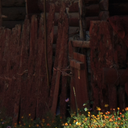

In [28]:
k = 10
im = Image.open('/home/dev/data_main/DIV2K/processed_128/HR/train/'+fs[k])
im

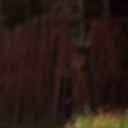

In [29]:
Image.open('/home/dev/data_main/DIV2K/processed_128/LR/train/'+fs[k])

In [19]:
fs[k]

'0770_896_1536.png'

In [27]:
fsv = os.listdir('/home/dev/data_main/DIV2K/processed_128/HR/valid/')

In [26]:
im, b, c = Image.open('/home/dev/data_main/DIV2K/processed_valid/HR/valid/'+fsv[0]).convert("YCbCr").split()
plt.imshow(np.array(im))

IndexError: list index out of range

In [271]:
im_array = np.array(im)
im_array.max()

254

In [274]:
transforms.ToTensor()(im).max()

tensor(0.9961)

In [2]:
import os
import copy

import torch
from torch import nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.utils.data.dataloader import DataLoader
from tqdm import tqdm

from models import SRCNN
from datasets import PatchDataset
from utils import AverageMeter, calc_psnr, save_images
import wandb as wandb
from omegaconf import OmegaConf as omg
   
cfg = omg.load("./config.yaml")
device = torch.device(cfg.device if torch.cuda.is_available() else "cpu")

torch.manual_seed(cfg.seed)

model = SRCNN( ker_one=9,
        ker_two=5,
        ker_three=5,)

eval_dataset = PatchDataset(cfg, train=False)
eval_dataloader = DataLoader(
    dataset=eval_dataset, shuffle=True, batch_size=1
)

best_weights = copy.deepcopy(model.state_dict())

best_epoch = 0
best_psnr = 0.0

In [3]:
model

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (conv2): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU(inplace=True)
)

In [4]:
state_dict = torch.load('/home/dev/work_main/2021/crcnn/resutls/epoch_25.909.pth', map_location='cpu')
model.load_state_dict(state_dict, )

<All keys matched successfully>

In [8]:
state_dict.keys()

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'conv3.weight', 'conv3.bias'])

In [6]:
img = next(iter(eval_dataloader))

In [7]:
out = model(img[0].to(device)).cpu().detach().numpy().squeeze(0).squeeze(0)
in_img = img[0].numpy().squeeze(0).squeeze(0)
targ_img = img[1].numpy().squeeze(0).squeeze(0)

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [79]:
print(np.abs(targ_img - out).mean())
print(np.abs(targ_img - in_img).mean())

0.030494612
0.027921153


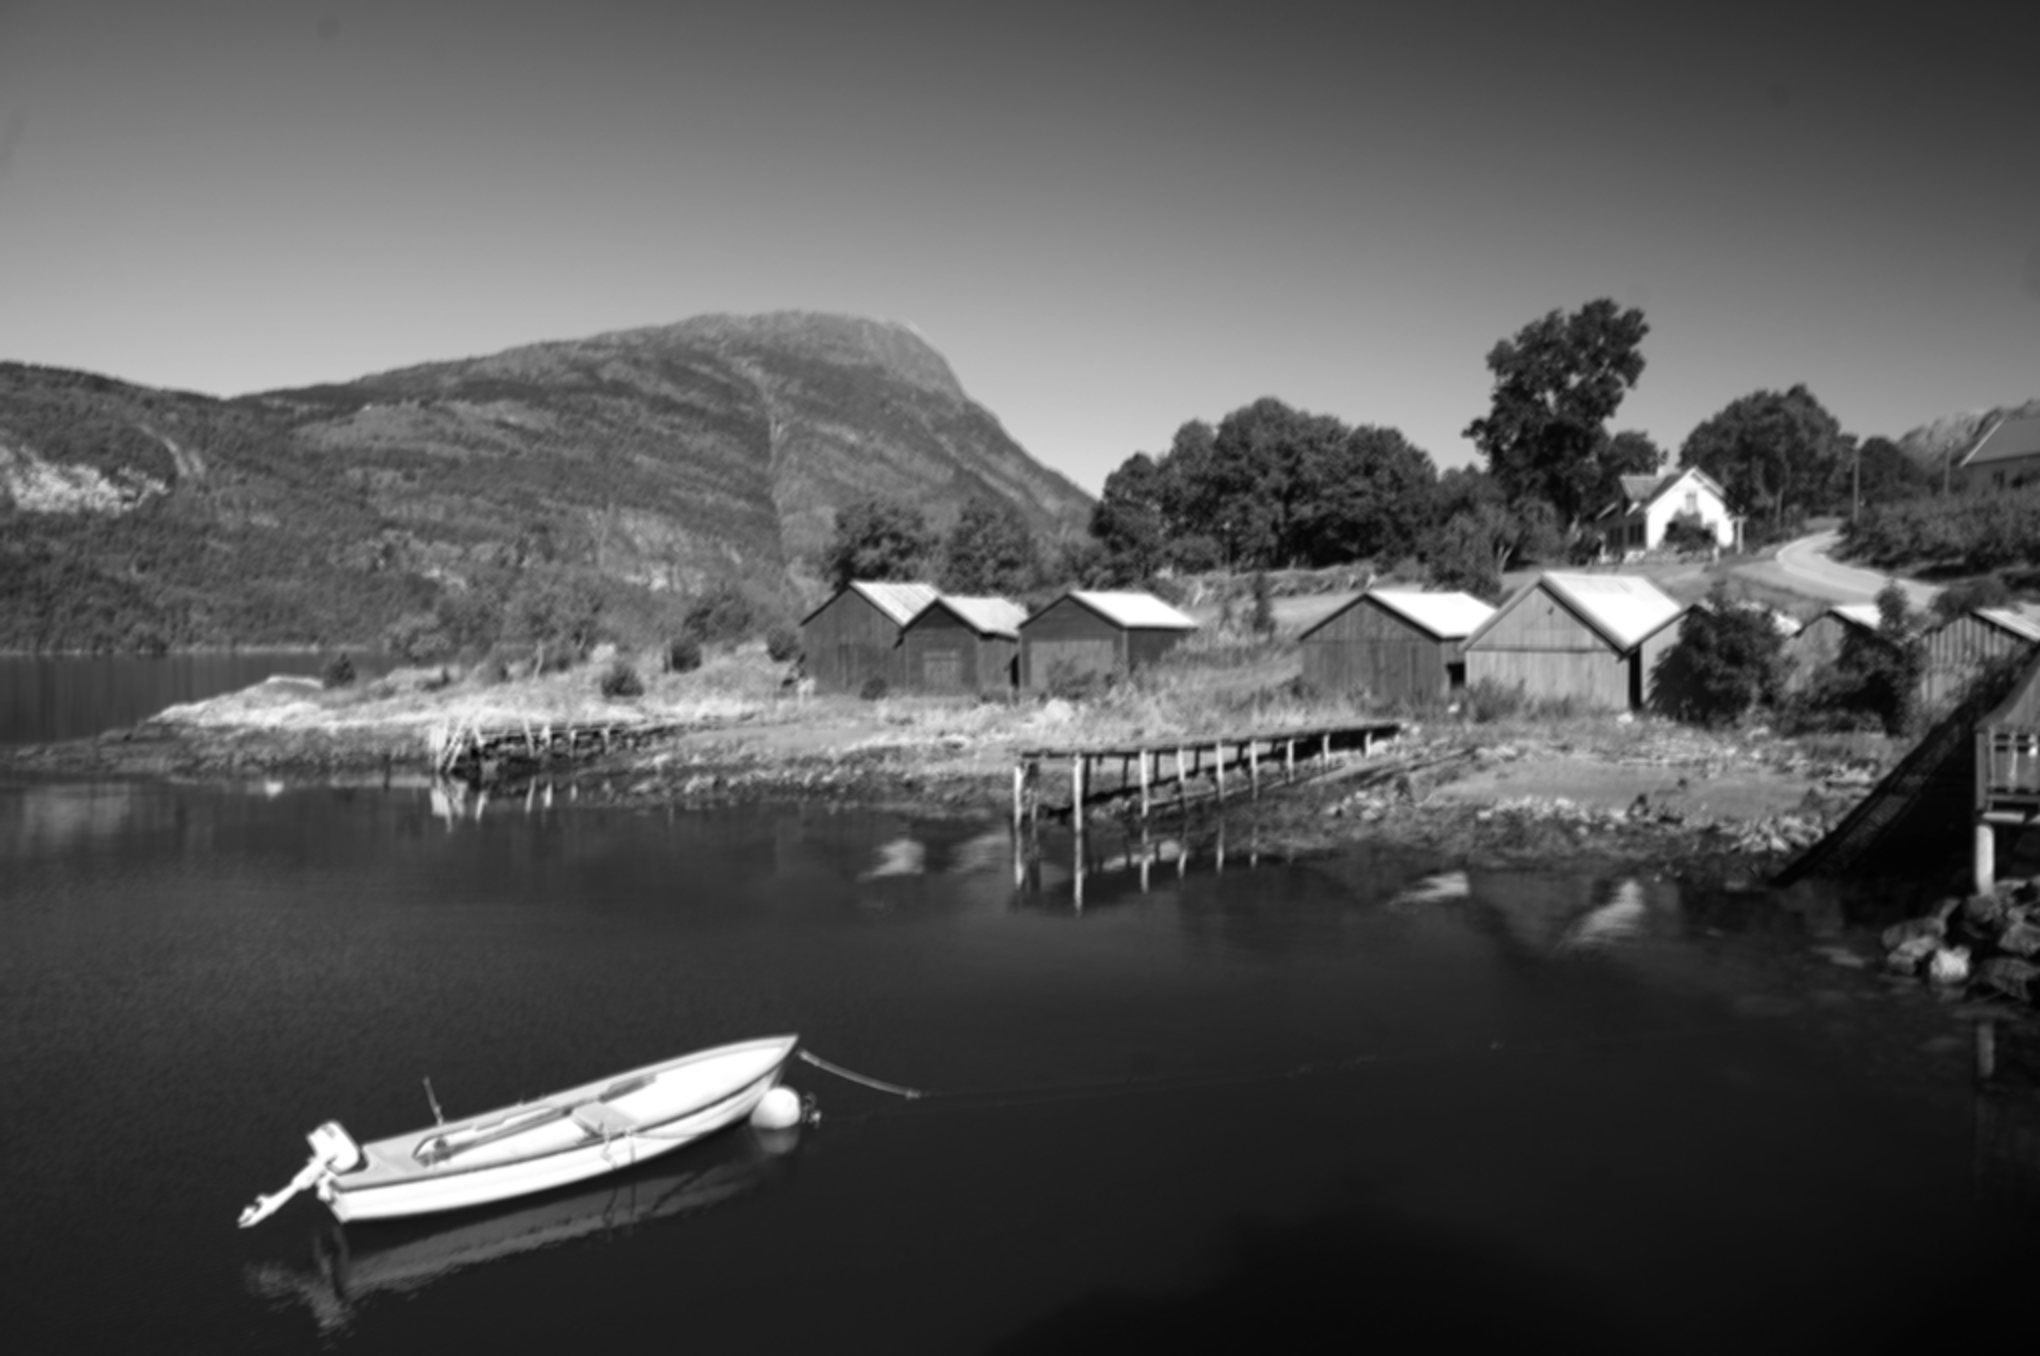

In [78]:
Image.fromarray((min_max(in_img)*255).astype(np.uint8))

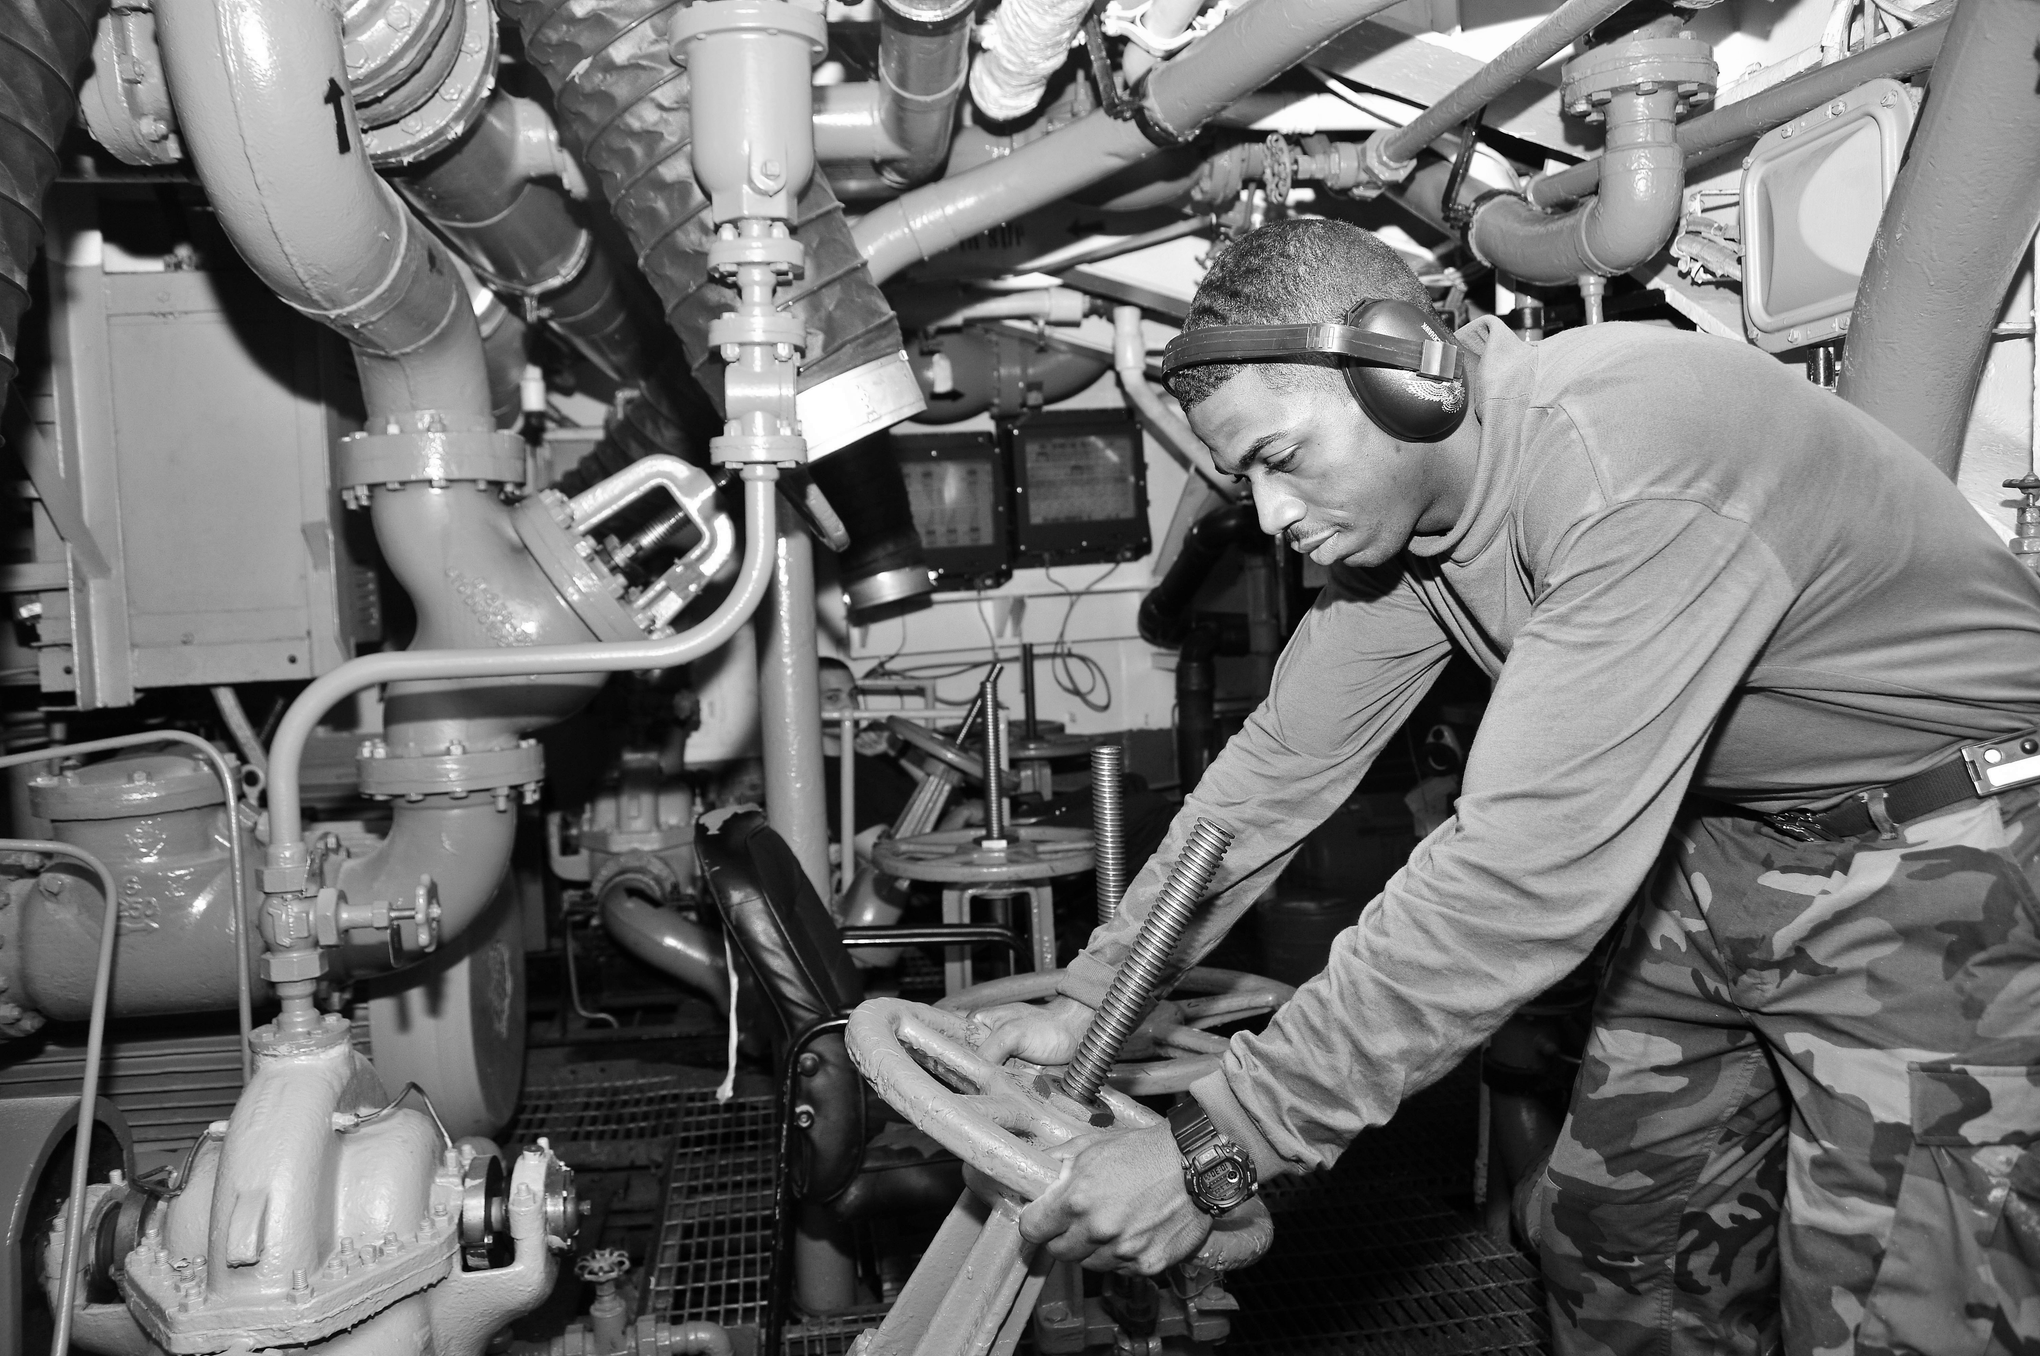

In [54]:
Image.fromarray((min_max(targ_img)*255).astype(np.uint8))